# [4] 이미지 어디까지 우려볼까?
- Augmentation 기법을 적용해 ResNet-50을 학습시킨다.
- 텐서플로우의 랜덤 augmentation API를 사용해보고, 기법을 익힌뒤 훈련 데이터셋의 augmentation 적용 여부에 따라 모델의 성능이 달라지는지 비교해본다.
  
실습목표

    Augmentation을 모델 학습에 적용하기
    Augmentation의 적용을 통한 학습 효과 확인하기
    최신 data augmentation 기법 구현 및 활용하기

학습 내용

    Augmentation 적용 (1) 데이터 불러오기
    Augmentation 적용 (2) Augmentation 적용하기
    Augmentation 적용 (3) 비교 실험하기
    심화 기법 (1) Cutmix Augmentation
    심화 기법 (2) Mixup Augmentation
    프로젝트: CutMix 또는 Mixup 비교실험하기


In [1]:
# 폴더 생성
! mkdir -p ~/aiffel/data_augmentation/data

## 4.2-Augmentation 적용 (1)데이터 불러오기
- 어떻게 augmentation을 텐서플로우 모델 학습에 적용 시킬 수 있을까?
- 모델 훈련 전 데이터 전처리를 통해 입력값으로 사용한다.

In [2]:
# tensorflow_datasets 설치
! pip install tensorflow_datasets

In [3]:
# 모듈 입력
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [4]:
# 학습 전엔 항상 GPU 확인하기~
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# 사용할 데이터셋 불러오기
import urllib3
urllib3.disable_warnings()
(ds_train,ds_test),ds_info = tfds.load(
'stanford_dogs',
split=['train','test'],
shuffle_files=True,
with_info=True,)

Dl Completed...: |          | 0/0 [00:00<?, ? url/s]

Dl Size...: |          | 0/0 [00:00<?, ? MiB/s]

Dl Completed...: |          | 0/0 [00:00<?, ? url/s]

Dl Size...: |          | 0/0 [00:00<?, ? MiB/s]

Extraction completed...: |          | 0/0 [00:00<?, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling stanford_dogs-train.tfrecord...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling stanford_dogs-test.tfrecord...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /home/aiffel/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


stanford_dogs 데이터셋 사용해보자
- 120개 견종 이미지가 있다
- 총 20,580장의 이미지 중 12,000장은 학습셋, 나머지 8,580장은 평가용 데이터셋 이다.

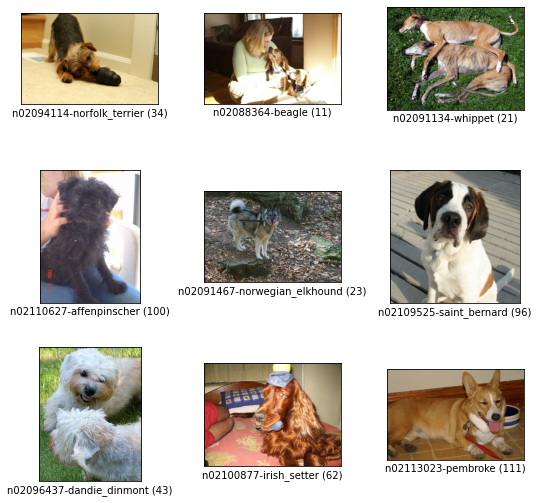

In [7]:
# 이미지 살펴보기
fig = tfds.show_examples(ds_train,ds_info)

## 4-3. Augmentation 적용(2) 적용하기
### 텐서플로우 Random Augmentation API 사용하기
- 텐서플로우 API 중 이미지셋에 대해 랜덤한 확률로 적용할 수 있는 함수
    - random_brightness()
    - random_contrast()
    - random_crop()
    - random_flip_left_right()
    - random_flip_up_down()
    - random_hue()
    - random_jpeg_quality()
    - random_saturation()    

In [8]:
# Augmentation 적용 전 전처리 함수 만들어주기
def normalize_and_resize_img(image,label):
    """Normalizes images: 'unit8' -> 'float32'"""
    image = tf.image.resize(image,[224,224])
    return tf.cast(image,tf.float32)/255.,label

def 전처리_함수(image, label):   # 변환할 이미지와   
    # 이미지 변환 로직 적용  
    new_image = 이미지_변환(image)  
    return new_image, label

- 이미지 변환의 결과로 리턴 받음 이미지를, 그 다음 전처리 함수의 입력으로 재사용 할 수 있는 구조이다.
- 입력 받은 이미지를 0~1 사이의 float32로 normalize하고, (224,224) 사이즈로 resize 한다. 이 함수는 훈련용/테스트용으로 사용 될 모든 이미지에 적용 될 것이다.
  
#### random_flip_left_right() ---- 좌우대칭
#### random_brightness() 활용하기
- 이미지 분류 문제에서 개 이미지는 좌우를 대칭하더라도 문제가 생기지 않는다. (적용하기)
- 상하대칭은 위아래가 뒤집힌 사진이 없으므로 도움이 되지 않을 것 같음


In [9]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image,max_delta=0.2)
    return image,label

**메인함수**  
apply_normalize_on_dataset()  
- 일반적인 전처리 과정 (normalize,resize,augmentation,shuffle)  
- 주의! shuffle과 augmentation은 테스트 데이터셋에는 적용하면 안된다!  
 
